# Image2text


##install

In [ ]:
!pip install torch==1.12.1;

In [ ]:
!git clone https://github.com/salesforce/LAVIS
%cd LAVIS
!pip install .

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/")
!ls

MyDrive


In [ ]:
import torch
from PIL import Image
import requests

from lavis.models import load_model_and_preprocess

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##Images description and save

In [ ]:
file_save = open('/content/gdrive/MyDrive/Project/images/descriptions.txt','w')
file_save.write('Descriptions' +'\n')
# file_save.close()

13

In [ ]:
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="large_coco", is_eval=True, device=device
)

In [ ]:
#Images descriptions

for i in range(1, 265):
  init_image = Image.open('/content/gdrive/MyDrive/Project/images/' + str(i) + '.jpg').convert("RGB")
  init_image = init_image.resize((512, 512))

  image = vis_processors["eval"](init_image).unsqueeze(0).to(device)
  # due to the non-determinstic nature of necleus sampling, you may get different captions.
  des = model.generate({"image": image}, use_nucleus_sampling=True, num_captions=1)
  file_save.write(des[0] +'\n')

file_save.close()

##Matching the given style

###Banksy

In [ ]:
file_save = open('/content/gdrive/MyDrive/Project/images/matching_style_Banksy.txt','w')
file_save.write('Answers' +'\n')

8

In [ ]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)
question = "Is this a Banksy style image?"
question = txt_processors["eval"](question)

  0%|          | 0.00/1.35G [00:00<?, ?B/s]

In [ ]:
#Is this a Banksy style image?
for i in range(1, 265):
  init_image = Image.open('/content/gdrive/MyDrive/Project/banksy/' + str(i) + '.jpg').convert("RGB")
  init_image = init_image.resize((512, 512))
  #model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)
  # ask a random question.
  image = vis_processors["eval"](init_image).unsqueeze(0).to(device)
  answer = model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")
  file_save.write(answer[0] +'\n')
file_save.close()

###Vincent Van Gogh

In [ ]:
file_save = open('/content/gdrive/MyDrive/Project/images/matching_style_Vincent.txt','w')
file_save.write('Answers' +'\n')

8

In [ ]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)
question = "Is this a Vincent Van Gogh style image?"
question = txt_processors["eval"](question)

In [ ]:
#Is this a Vincent Van Gogh style image?
for i in range(1, 265):
  init_image = Image.open('/content/gdrive/MyDrive/Project/vincent/' + str(i) + '.jpg').convert("RGB")
  init_image = init_image.resize((512, 512))
  # ask a random question.
  image = vis_processors["eval"](init_image).unsqueeze(0).to(device)
  answer = model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")
  file_save.write(answer[0] +'\n')
file_save.close()

###sad

In [ ]:
file_save = open('/content/gdrive/MyDrive/Project/images/matching_style_sad.txt','w')
file_save.write('Answers' +'\n')

8

In [ ]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)
question = "This picture is sad?"
question = txt_processors["eval"](question)

In [ ]:
#This picture is sad?
for i in range(1, 265):
  init_image = Image.open('/content/gdrive/MyDrive/Project/sad/' + str(i) + '.jpg').convert("RGB")
  init_image = init_image.resize((512, 512))
  # ask a random question.
  image = vis_processors["eval"](init_image).unsqueeze(0).to(device)
  answer = model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")
  file_save.write(answer[0] +'\n')
file_save.close()

###panda

In [ ]:
file_save = open('/content/gdrive/MyDrive/Project/images/matching_style_panda.txt','w')
file_save.write('Answers' +'\n')

8

In [ ]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)
question = "This image is in a panda style?"
question = txt_processors["eval"](question)

In [ ]:
#This image is in a panda style?
for i in range(1, 265):
  init_image = Image.open('/content/gdrive/MyDrive/Project/panda/' + str(i) + '.jpg').convert("RGB")
  init_image = init_image.resize((512, 512))
  # ask a random question.
  image = vis_processors["eval"](init_image).unsqueeze(0).to(device)
  answer = model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")
  file_save.write(answer[0] +'\n')
file_save.close()

#Stable diffusion

##install

In [ ]:
%%capture
!pip install torch==1.12.1+cu113
!pip install torchvision==0.13.1+cu113
!pip install OmegaConf
!pip install -qq accelerate tensorboard transformers ftfy gradio
!pip install triton==2.0.0.dev20220701
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install GPUtil
!pip install numba
!pip install https://github.com/apolinario/xformers/releases/download/0.0.3/xformers-0.0.14.dev0-cp38-cp38-linux_x86_64.whl

In [ ]:
import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

### 0 - Login in HuggingFace's Hub

In [ ]:
from huggingface_hub import login
from huggingface_hub import snapshot_download
import torch
import os
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Huggingface_Token = ""
login(token = Huggingface_Token )

ADD_LINK = "stabilityai/stable-diffusion-2-1-base" # runwayml/stable-diffusion-v1-5
WHERE_SAVE_SD_MODEL = os.getcwd()
snapshot_download(repo_id=ADD_LINK, cache_dir = os.getcwd())

In [ ]:
MODEL_NAME = "/content/models--stabilityai--stable-diffusion-2-1-base/snapshots/ae20c88a98ede80edcd1945220235e01292b098e"

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, DDIMScheduler, StableDiffusionImg2ImgPipeline, LMSDiscreteScheduler


scheduler_name="DPMSolverMultistepScheduler"
if scheduler_name == "DPMSolverMultistepScheduler":
    scheduler = DPMSolverMultistepScheduler.from_pretrained(MODEL_NAME, subfolder="scheduler")
    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
        MODEL_NAME,
        scheduler=scheduler,
        safety_checker=None,
        torch_dtype=torch.float16,
         feature_extractor=None,#раньшеработало без него
        revision="fp16",
    ).to("cuda")

In [ ]:
# make sure you're logged in by running the previous cell or `huggingface-cli login`
import torch
from contextlib import nullcontext
import requests
from PIL import Image
from io import BytesIO
from torch import autocast

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/")
!ls

MyDrive


In [ ]:
with open('/content/gdrive/MyDrive/Project/images/descriptions.txt') as f:
    list_str = f.read().splitlines() 

##painting in the style of Banksy

In [ ]:
negative_prompt = "" 
num_samples = 1 
guidance_scale =  9
num_inference_steps = 100 # num_inference_steps - (num_inference_steps - num_inference_steps*strength)
strength = 0.7

for i in range(1, 265):
  prompt = 'painting in the style of Banksy image ' + list_str[i]
  init_image = Image.open('/content/gdrive/MyDrive/Project/images/' + str(i) + '.jpg').convert("RGB")
  init_image = init_image.resize((512, 512))

  with autocast("cuda"), torch.inference_mode():
          images = pipe(
              prompt=prompt, 
              image=init_image, 
              strength=strength,
              negative_prompt=negative_prompt,
              num_images_per_prompt=num_samples,
              num_inference_steps=num_inference_steps,
              guidance_scale=guidance_scale,
              generator=None,
          ).images
  # Final generated image 
  for img in images:
    img.save('/content/gdrive/MyDrive/Project/banksy/' + str(i) + '.jpg')

##painting in the style of Vincent Van Gogh

In [ ]:
negative_prompt = "" 
num_samples = 1 
guidance_scale =  9
num_inference_steps = 100 # num_inference_steps - (num_inference_steps - num_inference_steps*strength)
strength = 0.7

for i in range(1, 265):
  prompt = 'painting in the style of Vincent Van Gogh image ' + list_str[i]
  init_image = Image.open('/content/gdrive/MyDrive/Project/images/' + str(i) + '.jpg').convert("RGB")
  init_image = init_image.resize((512, 512))

  with autocast("cuda"), torch.inference_mode():
          images = pipe(
              prompt=prompt, 
              image=init_image, 
              strength=strength,
              negative_prompt=negative_prompt,
              num_images_per_prompt=num_samples,
              num_inference_steps=num_inference_steps,
              guidance_scale=guidance_scale,
              generator=None,
          ).images
  # Final generated image 
  for img in images:
    img.save('/content/gdrive/MyDrive/Project/vincent/' + str(i) + '.jpg')

##painting in the sad style

In [ ]:
negative_prompt = "" 
num_samples = 1 
guidance_scale =  9
num_inference_steps = 100 # num_inference_steps - (num_inference_steps - num_inference_steps*strength)
strength = 0.7

for i in range(1, 265):
  prompt = 'sad image ' + list_str[i]
  init_image = Image.open('/content/gdrive/MyDrive/Project/images/' + str(i) + '.jpg').convert("RGB")
  init_image = init_image.resize((512, 512))

  with autocast("cuda"), torch.inference_mode():
          images = pipe(
              prompt=prompt, 
              image=init_image, 
              strength=strength,
              negative_prompt=negative_prompt,
              num_images_per_prompt=num_samples,
              num_inference_steps=num_inference_steps,
              guidance_scale=guidance_scale,
              generator=None,
          ).images
  # Final generated image 
  for img in images:
    img.save('/content/gdrive/MyDrive/Project/sad/' + str(i) + '.jpg')

##painting in the panda style

In [ ]:
negative_prompt = "" 
num_samples = 1 
guidance_scale =  9
num_inference_steps = 100 # num_inference_steps - (num_inference_steps - num_inference_steps*strength)
strength = 0.7

for i in range(1, 265):
  prompt = 'panda image ' + list_str[i]
  init_image = Image.open('/content/gdrive/MyDrive/Project/images/' + str(i) + '.jpg').convert("RGB")
  init_image = init_image.resize((512, 512))

  with autocast("cuda"), torch.inference_mode():
          images = pipe(
              prompt=prompt, 
              image=init_image, 
              strength=strength,
              negative_prompt=negative_prompt,
              num_images_per_prompt=num_samples,
              num_inference_steps=num_inference_steps,
              guidance_scale=guidance_scale,
              generator=None,
          ).images
  # Final generated image 
  for img in images:
    img.save('/content/gdrive/MyDrive/Project/panda/' + str(i) + '.jpg')

#Statistics

###panda

In [ ]:
with open('/content/gdrive/MyDrive/Project/images/matching_style_panda.txt') as f:
    list_str = f.read().splitlines() 

ans_panda = [0,]
for i in range(1, 265):
  if list_str[i] == "yes":
    h = 1
  else:
    h = 0
  ans_panda.append((ans_panda[i - 1] * (i - 1) + h) / i)


with open('/content/gdrive/MyDrive/Project/images/matching_style_sad.txt') as f:
    list_str = f.read().splitlines() 

ans_sad = [0,]
for i in range(1, 265):
  if list_str[i] == "yes":
    h = 1
  else:
    h = 0
  ans_sad.append((ans_sad[i - 1] * (i - 1) + h) / i)


with open('/content/gdrive/MyDrive/Project/images/matching_style_Vincent.txt') as f:
    list_str = f.read().splitlines() 

ans_vincent = [0,]
for i in range(1, 265):
  if list_str[i] == "yes":
    h = 1
  else:
    h = 0
  ans_vincent.append((ans_vincent[i - 1] * (i - 1) + h) / i)


with open('/content/gdrive/MyDrive/Project/images/matching_style_Banksy.txt') as f:
    list_str = f.read().splitlines() 

ans_Banksy = [0,]
for i in range(1, 265):
  if list_str[i] == "yes":
    h = 1
  else:
    h = 0
  ans_Banksy.append((ans_Banksy[i - 1] * (i - 1) + h) / i)

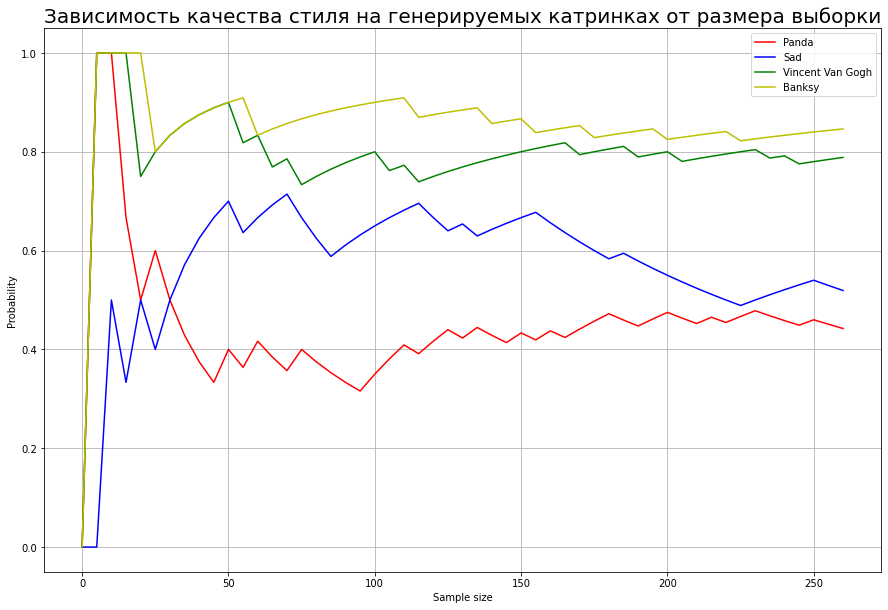

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.xlabel('Sample size')
plt.ylabel('Probability')
plt.title('Зависимость качества стиля на генерируемых катринках от размера выборки', size = 20)
x = [i for i in range(0, 264)]

plt.plot(x, ans_panda, 'r', label='Panda')
plt.plot(x, ans_sad, 'b', label='Sad')
plt.plot(x, ans_vincent, 'g', label='Vincent Van Gogh')
plt.plot(x, ans_Banksy, 'y', label='Banksy')
plt.legend()